In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [4]:
inv = pd.read_csv('inventories.csv')
cost = pd.read_csv('cost-histories.csv')

In [5]:
cost_melt = pd.melt(cost,
                     id_vars=['year', 'scenario', 'coarse grinding location', 'distance to recycling facility',
                             'distance to cement plant'],
                     value_vars=['landfilling cost', 'recycling to clinker cost', 'recycling to raw material cost'],
                     var_name='pathway', value_name='cost')

cost_melt.head()

,year,scenario,coarse grinding location,distance to recycling facility,distance to cement plant,pathway,cost
0,2011.00,bau,onsite,9.0,187.0,landfilling cost,1194.217727
1,2011.25,bau,onsite,9.0,187.0,landfilling cost,1218.325272
2,2011.50,bau,onsite,9.0,187.0,landfilling cost,1242.844971
3,2011.75,bau,onsite,9.0,187.0,landfilling cost,1267.776846
4,2012.00,bau,onsite,9.0,187.0,landfilling cost,1293.120918


In [6]:
# rename process column
inv['process'].iloc[inv['process']=='coarse grinding'] = 'recycle to clinker'
inv['process'].iloc[inv['process']=='fine grinding'] = 'recycle to raw material'

C:\Users\rhanes\AppData\Local\Continuum\anaconda3\envs\celavi\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [7]:
inv.head()

,Unnamed: 0,year,material,cumul_mass,mass,process,scenario,coarse grinding location,distance to recycling facility,distance to cement plant
0,0,2000.00,glass fiber reinforced polymer,-0.0,NaN,manufacturing,bau,onsite,9.0,187.0
1,1,2000.25,glass fiber reinforced polymer,-0.0,0.0,manufacturing,bau,onsite,9.0,187.0
2,2,2000.50,glass fiber reinforced polymer,-0.0,0.0,manufacturing,bau,onsite,9.0,187.0
3,3,2000.75,glass fiber reinforced polymer,-0.0,0.0,manufacturing,bau,onsite,9.0,187.0
4,4,2001.00,glass fiber reinforced polymer,33189.0,33189.0,manufacturing,bau,onsite,9.0,187.0


In [8]:
cost_melt.sort_values(by=['pathway'],inplace=True)
inv.sort_values(by=['process'],inplace=True)

In [9]:
# pathway use over time
# material = 'glass fiber reinforced polymer'
# no manufacturing, EOL flows only

use_dat = inv.loc[(inv['material']=='glass fiber reinforced polymer') & (inv['process']!='manufacturing')]
cost_dat = cost_melt

In [10]:
bau_use_dat = use_dat.loc[(use_dat['scenario']=='bau') & (use_dat['material']=='glass fiber reinforced polymer') &
                         (use_dat['process']!='manufacturing')]
hc_use_dat = use_dat.loc[(use_dat['scenario']=='hc') & (use_dat['material']=='glass fiber reinforced polymer') &
                         (use_dat['process']!='manufacturing')]

bau_cost_dat = cost_dat.loc[cost_dat['scenario']=='bau']
hc_cost_dat = cost_dat.loc[cost_dat['scenario']=='hc']

In [11]:
bau_use_dat.head()

,Unnamed: 0,year,material,cumul_mass,mass,process,scenario,coarse grinding location,distance to recycling facility,distance to cement plant
7034,1004,2050.00,glass fiber reinforced polymer,1563967.0,10531.0,landfilling,bau,onsite,51.0,204.0
7033,1003,2049.75,glass fiber reinforced polymer,1553436.0,12549.0,landfilling,bau,onsite,51.0,204.0
7032,1002,2049.50,glass fiber reinforced polymer,1540887.0,13503.0,landfilling,bau,onsite,51.0,204.0
7030,1000,2049.00,glass fiber reinforced polymer,1515106.0,11625.0,landfilling,bau,onsite,51.0,204.0
7005,975,2042.75,glass fiber reinforced polymer,1246923.0,10167.0,landfilling,bau,onsite,51.0,204.0


In [12]:
bau_cost_dat.head()

,year,scenario,coarse grinding location,distance to recycling facility,distance to cement plant,pathway,cost
0,2011.00,bau,onsite,9.0,187.0,landfilling cost,1194.217727
1875,2011.00,bau,onsite,765.0,803.0,landfilling cost,1194.217727
1876,2011.25,bau,onsite,765.0,803.0,landfilling cost,1218.325272
1877,2011.50,bau,onsite,765.0,803.0,landfilling cost,1242.844971
1878,2011.75,bau,onsite,765.0,803.0,landfilling cost,1267.776846


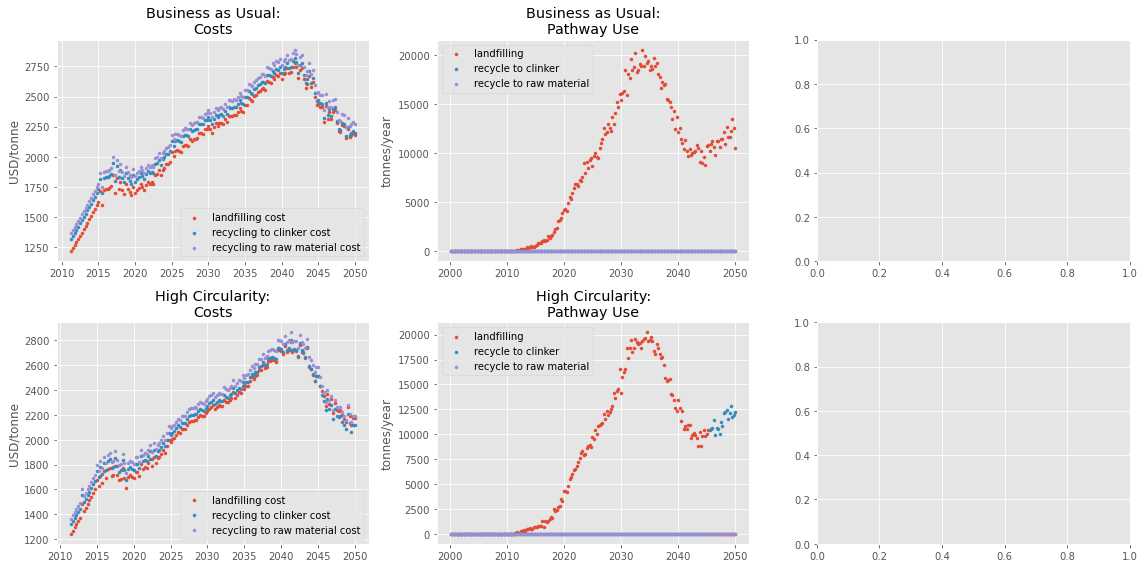

In [13]:
coarse_loc='onsite'
rec_dist = 51.0
cem_dist = 204.0

# facet column = scenario (2 rows)
fig, ((baucost, baupath, bauimp), (hccost, hcpath, hcimp)) = plt.subplots(2, 3, figsize=(16,8))
# x = year
# y = cumul_mass
# colour = pathway

for i in bau_cost_dat['pathway'].unique():
    baucost.scatter(bau_cost_dat.loc[(bau_cost_dat['pathway']==i) &
                                    (bau_cost_dat['coarse grinding location']==coarse_loc) &
                                    (bau_cost_dat['distance to recycling facility']==rec_dist) &
                                    (bau_cost_dat['distance to cement plant']==cem_dist)]['year'],
                    bau_cost_dat.loc[(bau_cost_dat['pathway']==i) &
                                    (bau_cost_dat['coarse grinding location']==coarse_loc) &
                                    (bau_cost_dat['distance to recycling facility']==rec_dist) &
                                    (bau_cost_dat['distance to cement plant']==cem_dist)]['cost'],
                    s=9, label=i)

baucost.legend()
baucost.set_ylabel("USD/tonne")
baucost.set_title("Business as Usual:\nCosts")

for i in bau_use_dat['process'].unique():
    baupath.scatter(bau_use_dat.loc[(bau_use_dat['process']==i) &
                                   (bau_use_dat['coarse grinding location']==coarse_loc) &
                                   (bau_use_dat['distance to recycling facility']==rec_dist) &
                                   (bau_use_dat['distance to cement plant']==cem_dist)]['year'], 
                    bau_use_dat.loc[(bau_use_dat['process']==i) &
                                   (bau_use_dat['coarse grinding location']==coarse_loc) &
                                   (bau_use_dat['distance to recycling facility']==rec_dist) &
                                   (bau_use_dat['distance to cement plant']==cem_dist)]['mass'],
                    s=9, label=i)

baupath.legend()
baupath.set_ylabel('tonnes/year')
baupath.set_title('Business as Usual:\nPathway Use')

for j in hc_cost_dat['pathway'].unique():
    hccost.scatter(hc_cost_dat.loc[(hc_cost_dat['pathway']==j) &
                                  (hc_cost_dat['coarse grinding location']==coarse_loc) &
                                  (hc_cost_dat['distance to recycling facility']==rec_dist) &
                                  (hc_cost_dat['distance to cement plant']==cem_dist)]['year'],
                   hc_cost_dat.loc[(hc_cost_dat['pathway']==j) &
                                  (hc_cost_dat['coarse grinding location']==coarse_loc) &
                                  (hc_cost_dat['distance to recycling facility']==rec_dist) &
                                  (hc_cost_dat['distance to cement plant']==cem_dist)]['cost'],
                   s=9, label=j)

hccost.legend()
hccost.set_ylabel("USD/tonne")
hccost.set_title("High Circularity:\nCosts")

for j in hc_use_dat['process'].unique():
    hcpath.scatter(hc_use_dat.loc[(hc_use_dat['process']==j) &
                                 (hc_use_dat['coarse grinding location']==coarse_loc) &
                                 (hc_use_dat['distance to recycling facility']==rec_dist) &
                                 (hc_use_dat['distance to cement plant']==cem_dist)]['year'],
                   hc_use_dat.loc[(hc_use_dat['process']==j) &
                                 (hc_use_dat['coarse grinding location']==coarse_loc) &
                                 (hc_use_dat['distance to recycling facility']==rec_dist) &
                                 (hc_use_dat['distance to cement plant']==cem_dist)]['mass'],
                   s=9, label=j)

hcpath.legend()
hcpath.set_ylabel('tonnes/year')
hcpath.set_title('High Circularity:\nPathway Use')

plt.tight_layout()

In [14]:
fig.savefig('results-summary.png', dpi=220)

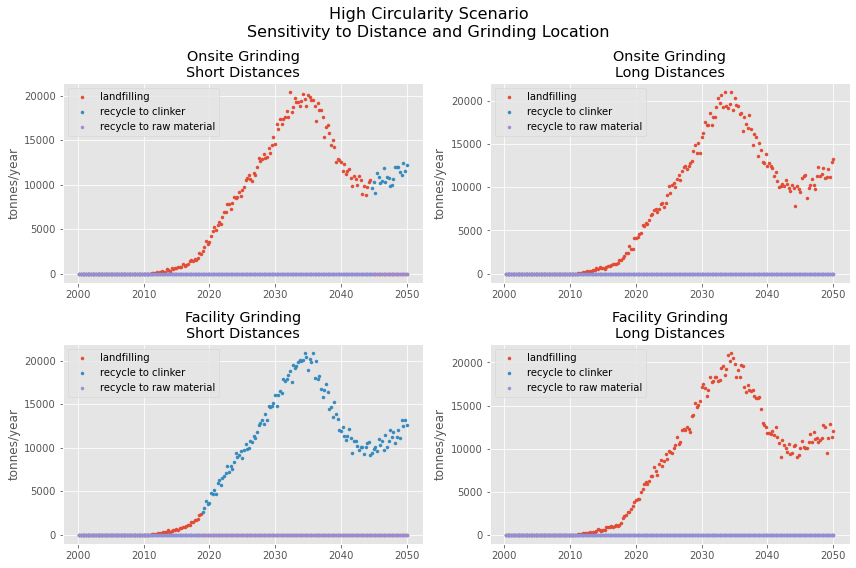

In [15]:
# costs by transpo distance and onsite/facility
# 2 columns of low-high transpo distance
# 2 rows of onsite and facility grinding
# SCENARIO = High Circularity
# x = year
#y = pathway use

fig, ((onslow, onshigh), (faclow, fachigh)) = plt.subplots(2, 2, figsize=(12,8))


for j in hc_use_dat['process'].unique():
    coarse_loc = 'onsite'
    rec_dist = 9.0
    cem_dist = 187.0
    
    onslow.scatter(hc_use_dat.loc[(hc_use_dat['process']==j) &
                                 (hc_use_dat['coarse grinding location']==coarse_loc) &
                                 (hc_use_dat['distance to recycling facility']==rec_dist) &
                                 (hc_use_dat['distance to cement plant']==cem_dist)]['year'],
                   hc_use_dat.loc[(hc_use_dat['process']==j) &
                                 (hc_use_dat['coarse grinding location']==coarse_loc) &
                                 (hc_use_dat['distance to recycling facility']==rec_dist) &
                                 (hc_use_dat['distance to cement plant']==cem_dist)]['mass'],
                   s=9, label=j)

onslow.legend()
onslow.set_ylabel('tonnes/year')
onslow.set_title('Onsite Grinding\nShort Distances')

for j in hc_use_dat['process'].unique():
    coarse_loc = 'onsite'
    rec_dist = 765.0
    cem_dist = 803.0
    
    onshigh.scatter(hc_use_dat.loc[(hc_use_dat['process']==j) &
                                 (hc_use_dat['coarse grinding location']==coarse_loc) &
                                 (hc_use_dat['distance to recycling facility']==rec_dist) &
                                 (hc_use_dat['distance to cement plant']==cem_dist)]['year'],
                   hc_use_dat.loc[(hc_use_dat['process']==j) &
                                 (hc_use_dat['coarse grinding location']==coarse_loc) &
                                 (hc_use_dat['distance to recycling facility']==rec_dist) &
                                 (hc_use_dat['distance to cement plant']==cem_dist)]['mass'],
                   s=9, label=j)

onshigh.legend()
onshigh.set_ylabel('tonnes/year')
onshigh.set_title('Onsite Grinding\nLong Distances')

for j in hc_use_dat['process'].unique():
    coarse_loc = 'facility'
    rec_dist = 765.0
    cem_dist = 803.0
    
    fachigh.scatter(hc_use_dat.loc[(hc_use_dat['process']==j) &
                                 (hc_use_dat['coarse grinding location']==coarse_loc) &
                                 (hc_use_dat['distance to recycling facility']==rec_dist) &
                                 (hc_use_dat['distance to cement plant']==cem_dist)]['year'],
                   hc_use_dat.loc[(hc_use_dat['process']==j) &
                                 (hc_use_dat['coarse grinding location']==coarse_loc) &
                                 (hc_use_dat['distance to recycling facility']==rec_dist) &
                                 (hc_use_dat['distance to cement plant']==cem_dist)]['mass'],
                   s=9, label=j)

fachigh.legend()
fachigh.set_ylabel('tonnes/year')
fachigh.set_title('Facility Grinding\nLong Distances')

for j in hc_use_dat['process'].unique():
    coarse_loc = 'facility'
    rec_dist = 9.0
    cem_dist = 187.0
    
    faclow.scatter(hc_use_dat.loc[(hc_use_dat['process']==j) &
                                 (hc_use_dat['coarse grinding location']==coarse_loc) &
                                 (hc_use_dat['distance to recycling facility']==rec_dist) &
                                 (hc_use_dat['distance to cement plant']==cem_dist)]['year'],
                   hc_use_dat.loc[(hc_use_dat['process']==j) &
                                 (hc_use_dat['coarse grinding location']==coarse_loc) &
                                 (hc_use_dat['distance to recycling facility']==rec_dist) &
                                 (hc_use_dat['distance to cement plant']==cem_dist)]['mass'],
                   s=9, label=j)

faclow.legend()
faclow.set_ylabel('tonnes/year')
faclow.set_title('Facility Grinding\nShort Distances')

fig.suptitle('High Circularity Scenario\nSensitivity to Distance and Grinding Location',fontsize=16)

plt.tight_layout()

In [16]:
fig.savefig('sensitivity-hc-summary.png', dpi=220)

In [17]:
# Circularity measurements and metrics
# look at cumulative measurements in 2050 rather than metrics over time

inv_2050 = inv.loc[inv['year']==2050.0]
inv_2050['turbine distances'] = inv_2050['distance to recycling facility'] + inv_2050['distance to cement plant']

inv_2050['turbine distances'].unique()

<ipython-input-17-c54af0dc28f1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inv_2050['turbine distances'] = inv_2050['distance to recycling facility'] + inv_2050['distance to cement plant']


array([ 255.,  196., 1568.])

In [18]:
inv_2050.sort_values(by=['turbine distances'],inplace=True)
inv_2050

<ipython-input-18-6b0c0802d2ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inv_2050.sort_values(by=['turbine distances'],inplace=True)


,Unnamed: 0,year,material,cumul_mass,mass,process,scenario,coarse grinding location,distance to recycling facility,distance to cement plant,turbine distances
2411,401,2050.0,concrete,1534246.0,0.0,manufacturing,hc,onsite,9.0,187.0,196.0
4622,602,2050.0,glass fiber reinforced polymer,1538150.0,11332.0,recycle to clinker,mc,facility,9.0,187.0,196.0
1406,401,2050.0,concrete,1534246.0,0.0,manufacturing,mc,onsite,9.0,187.0,196.0
2612,602,2050.0,glass fiber reinforced polymer,241086.0,12230.0,recycle to clinker,hc,onsite,9.0,187.0,196.0
3617,602,2050.0,glass fiber reinforced polymer,1514290.0,12688.0,recycle to clinker,bau,facility,9.0,187.0,196.0
...,...,...,...,...,...,...,...,...,...,...,...
16481,401,2050.0,concrete,1534246.0,0.0,manufacturing,mc,facility,765.0,803.0,1568.0
16280,200,2050.0,glass fiber reinforced polymer,2783409.0,0.0,manufacturing,mc,facility,765.0,803.0,1568.0
14672,602,2050.0,glass fiber reinforced polymer,0.0,0.0,recycle to clinker,hc,onsite,765.0,803.0,1568.0
18089,1004,2050.0,glass fiber reinforced polymer,1563964.0,12049.0,landfilling,hc,facility,765.0,803.0,1568.0


In [20]:
inv_2050.to_csv('inventories-2050.csv')

In [21]:
inv_2050 = pd.read_csv('inventories-2050-fractions.csv')
inv_2050['mass_frac'] = (inv_2050['mass_frac'] * 100.0).astype('int')

In [22]:
inv_2050

,Unnamed: 0,Unnamed: 0.1,year,material,cumul_mass,mass_frac,mass,process,scenario,coarse grinding location,turbine distances
0,4019,1004,2050,glass fiber reinforced polymer,52146,3,0,landfilling,bau,facility,196
1,3617,602,2050,glass fiber reinforced polymer,1514290,96,12688,recycle to clinker,bau,facility,196
2,3818,803,2050,glass fiber reinforced polymer,0,0,0,recycle to raw material,bau,facility,196
3,1004,1004,2050,glass fiber reinforced polymer,1565178,100,12936,landfilling,bau,onsite,196
4,602,602,2050,glass fiber reinforced polymer,0,0,0,recycle to clinker,bau,onsite,196
5,803,803,2050,glass fiber reinforced polymer,0,0,0,recycle to raw material,bau,onsite,196
6,10049,1004,2050,glass fiber reinforced polymer,1299860,82,0,landfilling,bau,facility,255
7,9647,602,2050,glass fiber reinforced polymer,267659,17,12011,recycle to clinker,bau,facility,255
8,9848,803,2050,glass fiber reinforced polymer,0,0,0,recycle to raw material,bau,facility,255
9,7034,1004,2050,glass fiber reinforced polymer,1563967,100,10531,landfilling,bau,onsite,255


In [23]:
bau_inv_2050 = inv_2050.loc[(inv_2050['scenario']=='bau')]
hc_inv_2050 = inv_2050.loc[(inv_2050['scenario']=='hc')]

In [24]:
bau_inv_2050

,Unnamed: 0,Unnamed: 0.1,year,material,cumul_mass,mass_frac,mass,process,scenario,coarse grinding location,turbine distances
0,4019,1004,2050,glass fiber reinforced polymer,52146,3,0,landfilling,bau,facility,196
1,3617,602,2050,glass fiber reinforced polymer,1514290,96,12688,recycle to clinker,bau,facility,196
2,3818,803,2050,glass fiber reinforced polymer,0,0,0,recycle to raw material,bau,facility,196
3,1004,1004,2050,glass fiber reinforced polymer,1565178,100,12936,landfilling,bau,onsite,196
4,602,602,2050,glass fiber reinforced polymer,0,0,0,recycle to clinker,bau,onsite,196
5,803,803,2050,glass fiber reinforced polymer,0,0,0,recycle to raw material,bau,onsite,196
6,10049,1004,2050,glass fiber reinforced polymer,1299860,82,0,landfilling,bau,facility,255
7,9647,602,2050,glass fiber reinforced polymer,267659,17,12011,recycle to clinker,bau,facility,255
8,9848,803,2050,glass fiber reinforced polymer,0,0,0,recycle to raw material,bau,facility,255
9,7034,1004,2050,glass fiber reinforced polymer,1563967,100,10531,landfilling,bau,onsite,255


In [25]:
hc_inv_2050

,Unnamed: 0,Unnamed: 0.1,year,material,cumul_mass,mass_frac,mass,process,scenario,coarse grinding location,turbine distances
18,6029,1004,2050,glass fiber reinforced polymer,24844,1,0,landfilling,hc,facility,196
19,5627,602,2050,glass fiber reinforced polymer,1541764,98,12669,recycle to clinker,hc,facility,196
20,5828,803,2050,glass fiber reinforced polymer,0,0,0,recycle to raw material,hc,facility,196
21,3014,1004,2050,glass fiber reinforced polymer,1319714,84,0,landfilling,hc,onsite,196
22,2612,602,2050,glass fiber reinforced polymer,241086,15,12230,recycle to clinker,hc,onsite,196
23,2813,803,2050,glass fiber reinforced polymer,0,0,0,recycle to raw material,hc,onsite,196
24,12059,1004,2050,glass fiber reinforced polymer,512138,32,0,landfilling,hc,facility,255
25,11657,602,2050,glass fiber reinforced polymer,1049276,67,11478,recycle to clinker,hc,facility,255
26,11858,803,2050,glass fiber reinforced polymer,0,0,0,recycle to raw material,hc,facility,255
27,9044,1004,2050,glass fiber reinforced polymer,1346843,86,0,landfilling,hc,onsite,255


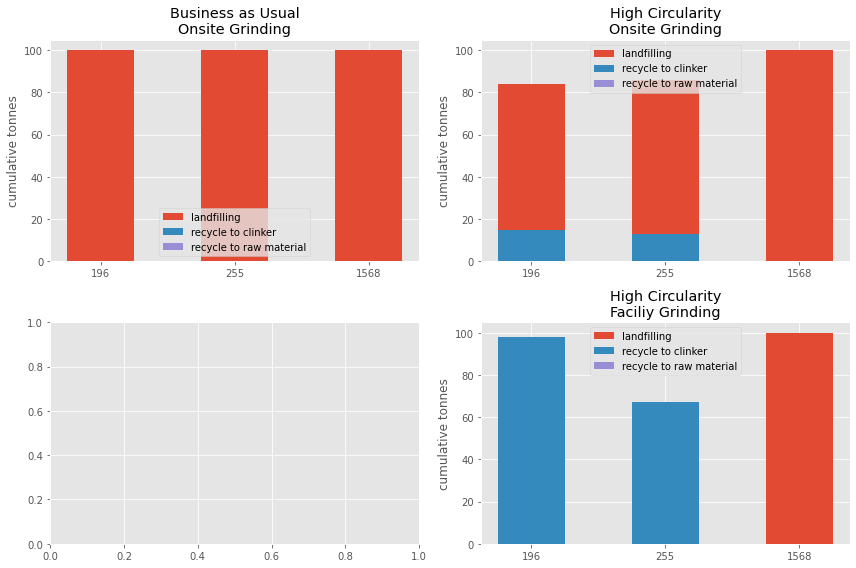

In [26]:
# bar chart
# two subplot columns: Business as Usual, High Circularity
# two subplot rows: onsite grinding, facility grinding
# two bars on each subplot: short distances, high distances
# three colors: landfilling, recycling to clinker, recycling to raw material
# metric for each bar on each subplot: (recycling to clinker + recycling to raw material)/landfilling
# x = turbine distances
# y = cumul_mass

fig, ((bauons, hcons), (baufac, hcfac)) = plt.subplots(2, 2, figsize=(12,8))


for i in bau_inv_2050['process'].unique():
    bauons.bar(bau_inv_2050['turbine distances'].loc[(bau_inv_2050['process']==i) &
                                                     (bau_inv_2050['coarse grinding location']=='onsite')].astype('string'),
               bau_inv_2050['mass_frac'].loc[(bau_inv_2050['process']==i) &
                                              (bau_inv_2050['coarse grinding location']=='onsite')],
    label=i, width=0.5)

bauons.legend()
bauons.set_ylabel('cumulative tonnes')
bauons.set_title('Business as Usual\nOnsite Grinding')



for i in hc_inv_2050['process'].unique():
    hcons.bar(hc_inv_2050['turbine distances'].loc[(hc_inv_2050['process']==i) &
                                                   (hc_inv_2050['coarse grinding location']=='onsite')].astype('string'),
              hc_inv_2050['mass_frac'].loc[(hc_inv_2050['process']==i) &
                                            (hc_inv_2050['coarse grinding location']=='onsite')],
    label=i, width=0.5)

hcons.legend()
hcons.set_ylabel('cumulative tonnes')
hcons.set_title('High Circularity\nOnsite Grinding')



for i in hc_inv_2050['process'].unique():
    hcfac.bar(hc_inv_2050['turbine distances'].loc[(hc_inv_2050['process']==i) &
                                                   (hc_inv_2050['coarse grinding location']=='facility')].astype('string'),
              hc_inv_2050['mass_frac'].loc[(hc_inv_2050['process']==i) &
                                            (hc_inv_2050['coarse grinding location']=='facility')],
    label=i, width=0.5)

hcfac.legend()
hcfac.set_ylabel('cumulative tonnes')
hcfac.set_title('High Circularity\nFaciliy Grinding')

plt.tight_layout()


In [27]:
for i in bau_inv_2050['process'].unique():
    bauons.bar(bau_inv_2050['turbine distances'].loc[(bau_inv_2050['process']==i) &
                                                     (bau_inv_2050['coarse grinding location']=='onsite')].astype('string'),
               bau_inv_2050['mass_frac'].loc[(bau_inv_2050['process']==i) &
                                              (bau_inv_2050['coarse grinding location']=='onsite')],
    label=i, width=0.5)

bauons.legend()
bauons.set_ylabel('cumulative tonnes')
bauons.set_title('Business as Usual\nOnsite Grinding')



for i in hc_inv_2050['process'].unique():
    hcons.bar(hc_inv_2050['turbine distances'].loc[(hc_inv_2050['process']==i) &
                                                   (hc_inv_2050['coarse grinding location']=='onsite')].astype('string'),
              hc_inv_2050['mass_frac'].loc[(hc_inv_2050['process']==i) &
                                            (hc_inv_2050['coarse grinding location']=='onsite')],
    label=i, width=0.5)

hcons.legend()
hcons.set_ylabel('cumulative tonnes')
hcons.set_title('High Circularity\nOnsite Grinding')



for i in hc_inv_2050['process'].unique():
    hcfac.bar(hc_inv_2050['turbine distances'].loc[(hc_inv_2050['process']==i) &
                                                   (hc_inv_2050['coarse grinding location']=='facility')].astype('string'),
              hc_inv_2050['mass_frac'].loc[(hc_inv_2050['process']==i) &
                                            (hc_inv_2050['coarse grinding location']=='facility')],
    label=i, width=0.5)

hcfac.legend()
hcfac.set_ylabel('cumulative tonnes')
hcfac.set_title('High Circularity\nFaciliy Grinding')

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

## Additional postprocessing of material flow inventories

In [83]:
lci_out = pd.read_csv('lci_for_postprocessing.csv')

In [84]:
# calculate input quantities - will need them to calculate the offsets
lci_out['input quantity'] = lci_out['mass'] * lci_out['quantity']

In [85]:
lci_out

,Unnamed: 0,year,material,cumul_mass,mass,process,scenario,coarse grinding location,distance to recycling facility,distance to cement plant,input unit,input name,quantity,input quantity
0,4,2000.25,glass fiber reinforced polymer,-0.0,0.0,manufacturing,bau,onsite,51.0,204.0,kWh,electricity,1084.00,0.00
1,5,2000.25,glass fiber reinforced polymer,-0.0,0.0,manufacturing,bau,onsite,51.0,204.0,kg,epoxy,399.00,0.00
2,6,2000.25,glass fiber reinforced polymer,-0.0,0.0,manufacturing,bau,onsite,51.0,204.0,kg,glass fiber,513.00,0.00
3,7,2000.25,glass fiber reinforced polymer,-0.0,0.0,manufacturing,bau,onsite,51.0,204.0,kg,filler,456.00,0.00
4,8,2000.50,glass fiber reinforced polymer,-0.0,0.0,manufacturing,bau,onsite,51.0,204.0,kWh,electricity,1084.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,3211,2049.00,glass fiber reinforced polymer,1515685.0,10134.0,landfilling,bau,onsite,51.0,204.0,kWh,electricity,1.88,19051.92
3205,3212,2049.25,glass fiber reinforced polymer,1527377.0,11692.0,landfilling,bau,onsite,51.0,204.0,kWh,electricity,1.88,21980.96
3206,3213,2049.50,glass fiber reinforced polymer,1538941.0,11564.0,landfilling,bau,onsite,51.0,204.0,kWh,electricity,1.88,21740.32
3207,3214,2049.75,glass fiber reinforced polymer,1552242.0,13301.0,landfilling,bau,onsite,51.0,204.0,kWh,electricity,1.88,25005.88


In [86]:
# duplicate rows with GFRP coarse grinding
# then turn these rows into negative inputs to concrete manufacturing
gfrp_clinker = lci_out.loc[(lci_out['material']=='glass fiber reinforced polymer') & 
                           (lci_out['process']=='coarse grinding')]
gfrp_coal = lci_out.loc[(lci_out['material']=='glass fiber reinforced polymer') & 
                        (lci_out['process']=='coarse grinding')]
gfrp_clinker

,Unnamed: 0,year,material,cumul_mass,mass,process,scenario,coarse grinding location,distance to recycling facility,distance to cement plant,input unit,input name,quantity,input quantity
2609,2614,2000.25,glass fiber reinforced polymer,0.0,0.0,coarse grinding,bau,onsite,51.0,204.0,kWh,electricity,23.613,0.0
2610,2615,2000.50,glass fiber reinforced polymer,0.0,0.0,coarse grinding,bau,onsite,51.0,204.0,kWh,electricity,23.613,0.0
2611,2616,2000.75,glass fiber reinforced polymer,0.0,0.0,coarse grinding,bau,onsite,51.0,204.0,kWh,electricity,23.613,0.0
2612,2617,2001.00,glass fiber reinforced polymer,0.0,0.0,coarse grinding,bau,onsite,51.0,204.0,kWh,electricity,23.613,0.0
2613,2618,2001.25,glass fiber reinforced polymer,0.0,0.0,coarse grinding,bau,onsite,51.0,204.0,kWh,electricity,23.613,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,2809,2049.00,glass fiber reinforced polymer,0.0,0.0,coarse grinding,bau,onsite,51.0,204.0,kWh,electricity,23.613,0.0
2805,2810,2049.25,glass fiber reinforced polymer,0.0,0.0,coarse grinding,bau,onsite,51.0,204.0,kWh,electricity,23.613,0.0
2806,2811,2049.50,glass fiber reinforced polymer,0.0,0.0,coarse grinding,bau,onsite,51.0,204.0,kWh,electricity,23.613,0.0
2807,2812,2049.75,glass fiber reinforced polymer,0.0,0.0,coarse grinding,bau,onsite,51.0,204.0,kWh,electricity,23.613,0.0


In [87]:
gfrp_clinker['material'] = 'concrete'
gfrp_clinker['process'] = 'manufacturing'
gfrp_clinker['input unit'] = 'kg'
gfrp_clinker['input name'] = 'limestone'
gfrp_clinker['input quantity'] = -1.0 * 0.5 * gfrp_clinker['mass']
gfrp_clinker['cumul_mass'] = 0
gfrp_clinker['mass'] = 0

<ipython-input-87-127cb4336f5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gfrp_clinker['material'] = 'concrete'
<ipython-input-87-127cb4336f5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gfrp_clinker['process'] = 'manufacturing'
<ipython-input-87-127cb4336f5b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [88]:
gfrp_coal['material'] = 'concrete'
gfrp_coal['process'] = 'manufacturing'
gfrp_coal['input unit'] = 'kg'
gfrp_coal['input name'] = 'coal'
gfrp_coal['input quantity'] = -1.0 * 0.25 * gfrp_clinker['mass']
gfrp_coal['cumul_mass'] = 0
gfrp_coal['mass'] = 0

<ipython-input-88-f0dfe4021fa6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gfrp_coal['material'] = 'concrete'
<ipython-input-88-f0dfe4021fa6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gfrp_coal['process'] = 'manufacturing'
<ipython-input-88-f0dfe4021fa6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [89]:
lci_out_offsets = lci_out.append(gfrp_clinker).append(gfrp_coal)

In [90]:
# remove columns that the LCA code doesn't need
lci_out_offsets.drop(columns=['Unnamed: 0', 'cumul_mass', 'mass', 'quantity'], axis=1, inplace=True)

In [91]:
# now sum up the positive and negative input quantities
lci_out_offsets.groupby(['year', 'material', 'process', 'scenario', 'coarse grinding location',
                        'distance to recycling facility', 'distance to cement plant', 'input unit',
                        'input name']).sum()

# and remove rows where input quantity = 0
lci_out_offsets = lci_out_offsets.loc[lci_out_offsets['input quantity']!=0.0]

In [105]:
lci_out_offsets

,year,material,process,scenario,coarse grinding location,distance to recycling facility,distance to cement plant,input unit,input name,input quantity
12,2001.00,glass fiber reinforced polymer,manufacturing,bau,onsite,51.0,204.0,kWh,electricity,35976876.00
13,2001.00,glass fiber reinforced polymer,manufacturing,bau,onsite,51.0,204.0,kg,epoxy,13242411.00
14,2001.00,glass fiber reinforced polymer,manufacturing,bau,onsite,51.0,204.0,kg,glass fiber,17025957.00
15,2001.00,glass fiber reinforced polymer,manufacturing,bau,onsite,51.0,204.0,kg,filler,15134184.00
28,2002.00,glass fiber reinforced polymer,manufacturing,bau,onsite,51.0,204.0,kWh,electricity,81300.00
...,...,...,...,...,...,...,...,...,...,...
3204,2049.00,glass fiber reinforced polymer,landfilling,bau,onsite,51.0,204.0,kWh,electricity,19051.92
3205,2049.25,glass fiber reinforced polymer,landfilling,bau,onsite,51.0,204.0,kWh,electricity,21980.96
3206,2049.50,glass fiber reinforced polymer,landfilling,bau,onsite,51.0,204.0,kWh,electricity,21740.32
3207,2049.75,glass fiber reinforced polymer,landfilling,bau,onsite,51.0,204.0,kWh,electricity,25005.88


In [133]:
# add transportation to the bottom
transpo = pd.read_csv('transpo-eol.csv')

In [134]:
# rename the total eol transportation column to 'input quantity'
transpo.rename(columns={'total eol transportation':'input quantity'}, inplace=True)
# add material column with 'glass fiber reinforced polymer'
transpo['material'] = 'glass fiber reinforced polymer'
# add process column with 'transportation'
transpo['process'] = 'transportation'
# add input unit column with 'tonne-km'
transpo['input unit'] = 'tonne-km'
# add input name column with 'transport'
transpo['input name'] = 'transportation'
# remove the inventory column
transpo.drop(columns=['inventory'], inplace=True)

In [135]:
transpo

,year,input quantity,scenario,coarse grinding location,distance to recycling facility,distance to cement plant,material,process,input unit,input name
0,2011.00,2698.8,bau,onsite,9.0,187.0,glass fiber reinforced polymer,transportation,tonne-km,transportation
1,2011.25,899.6,bau,onsite,9.0,187.0,glass fiber reinforced polymer,transportation,tonne-km,transportation
2,2011.50,5397.6,bau,onsite,9.0,187.0,glass fiber reinforced polymer,transportation,tonne-km,transportation
3,2011.75,10795.2,bau,onsite,9.0,187.0,glass fiber reinforced polymer,transportation,tonne-km,transportation
4,2012.00,8096.4,bau,onsite,9.0,187.0,glass fiber reinforced polymer,transportation,tonne-km,transportation
...,...,...,...,...,...,...,...,...,...,...
2809,2049.00,659891.2,hc,facility,765.0,803.0,glass fiber reinforced polymer,transportation,tonne-km,transportation
2810,2049.25,780645.2,hc,facility,765.0,803.0,glass fiber reinforced polymer,transportation,tonne-km,transportation
2811,2049.50,890327.2,hc,facility,765.0,803.0,glass fiber reinforced polymer,transportation,tonne-km,transportation
2812,2049.75,784312.8,hc,facility,765.0,803.0,glass fiber reinforced polymer,transportation,tonne-km,transportation


In [136]:
lci_out_offsets_transpo = pd.concat([lci_out_offsets, transpo])

In [146]:
lci_out_offsets_transpo.to_csv('celavi-results-lci.csv')